## finite differenzen
Wärmeleitungsgleichung
\begin{equation}
\frac{d}{d t} \big(c \rho T(x,t)\big) = \nabla \big( \lambda \nabla T \big) + \varphi(x,y,z,t)\\
\end{equation}
Der Körper wird in ein Netz aus Knotenpunkten zerlegt.<br> Die Ableitungen werden als differenzen zweier benachbarter Knotenpunkte geschrieben.<br>
\begin{equation}
\frac{\partial^2}{\partial x^2} T(x,t) = \frac{\partial}{\partial x} \frac{T_{i+1}-T_{i}}{L}\\
\frac{T_{i+1} - 2 T_{i} +  T_{i-1} }{L^2}
\end{equation}
Daraus ergibt sich ein Gleichungssystem, mit dessen Hilfe die Temperatur an allen Knotenpunkten berechnet werden kann.<br>
Im nicht stationären Fall müssen die Temperaturwerte am Anfang (t=0) vorgegeben sein. Dann wird aus Lösung des Gleichungssystems die Zeitableitung im Zeitschritt (t) erhalten, so dass mit dem Eulerverfahren der nächste Zeitschritt (t+1) berechnet werden kann.
\begin{equation}
T_{t+1,i} =  T_{t,i} + \Delta t \cdot \frac{\partial T(t,i)}{\partial t} 
\end{equation}

## Formulierung eines 1D Beispiel-Problems

stationäre Wärmeleitung
\begin{equation}
\underbrace{\frac{d}{d t} (c \rho T)}_{=0} = \nabla \big( \lambda \nabla T \big) + \varphi(x,y,z,t)\\
\Leftrightarrow -\lambda \nabla^2 T = \varphi \\
-\lambda \nabla T = q
\end{equation}

Knoten $x \in\{2m,4m,6m,8m\}$<br>
womit $L=2m$<br>
mit:
(Querschnittsfläche $A = 10 m^2$)<br>
Wärmeleitfähigkeit $\lambda = 5 \frac{W}{m K}$<br>
Wärmequelle-Dichte $\varphi = 10 \frac{W}{m^3}$<br>
,Randbedingungen:<br>
Temperatur: $T(2m)=T_2=0°C$<br>
Wärmefluss: $q(8m)=q_8=15 \frac{W}{m^2}$<br>
und mit finiten Differenzen folgt:
\begin{equation}
\frac{T_{i+1} - 2 T_{i} +  T_{i-1} }{L^2} = - \frac{\varphi}{\lambda} \\
\Rightarrow \frac{T_{8} - 2 T_{6} +  T_{4} }{L^2} = - 2 \frac{K}{m^2} \\
\Rightarrow \frac{T_{6} - 2 T_{4} +  T_{2} }{L^2} = - 2 \frac{K}{m^2} \\
\frac{T_{i+1} - T_{i}}{L} = -\frac{q}{\lambda} \\
\Rightarrow \frac{T_{8} - T_{6}}{L} = \frac{q_8}{\lambda} =  3 \frac{K}{m}
\end{equation}

in Matrixschreibweise:
\begin{equation}
\begin{pmatrix} 1 & -2 & 1 & 0 \\ 0 & 1 & -2 & 1 \\ 0 & 0 & 1 & -1 \end{pmatrix} \begin{pmatrix} T_2 = 0°C \\ T_4 \\ T_6 \\ T_8 \end{pmatrix} = \begin{pmatrix} -8 \\ -8 \\ -6 \end{pmatrix} \\
\begin{pmatrix} -2 & 1 & 0 \\ 1 & -2 & 1 \\ 0 & 1 & -1 \end{pmatrix} \begin{pmatrix} T_4 \\ T_6 \\ T_8 \end{pmatrix} = \begin{pmatrix} -8 \\ -8 \\ -6 \end{pmatrix}
\end{equation}


In [40]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [41]:

aa = np.array([[-2,1,0],[1,-2,1],[0,1,-1]])
bb = np.array([-8,-8,6])
solution = np.linalg.solve(aa,bb)

xx = [2,4,6,8]
solution = np.concatenate(([0],solution))

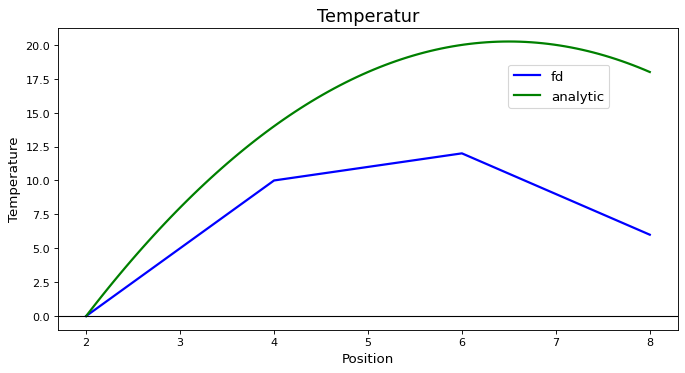

In [42]:
fig = plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
ax0=plt.subplot()
x=np.linspace(2,8,101)
ax0.plot(xx,solution,color="blue",label="fd", linewidth=2, zorder=2)
ax0.plot(x,(-x**2+13*x-22),color="green",label="analytic", linewidth=2, zorder=2)
ax0.axhline(0, color='black', lw=1)
ax0.legend(fontsize=12, bbox_to_anchor=(0.9,0.9))
ax0.set_title('Temperatur', fontsize=16)
ax0.set_xlabel('Position', fontsize=12)
ax0.set_ylabel('Temperature', fontsize=12)
plt.show()

## mehr Stützstellen (N+1)

In [38]:

N = 100
L = 6/(N-1)
aa = np.zeros((N,N))
aa[0,0:2] = [-2,1]
aa[N-1,N-2:N] = [1,-1]
for n in range(1,N-1):
    aa[n,n-1:n+2] = [1,-2,1]
bb = np.ones(N)*-2*L**2
bb[N-1] = 3*L
solution = np.linalg.solve(aa,bb)

xx = np.linspace(2,8,N+1)
solution = np.concatenate(([0],solution))

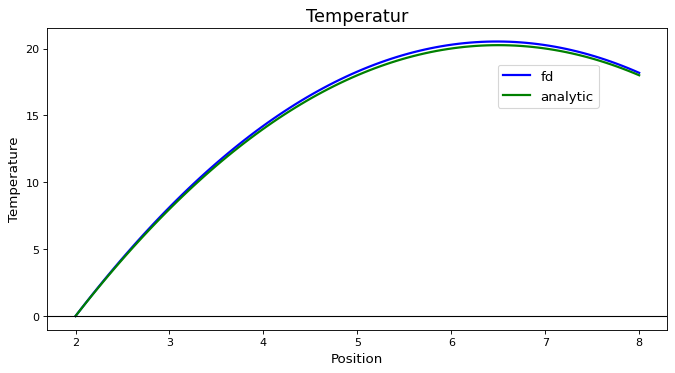

In [39]:
fig = plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
ax0=plt.subplot()
x=np.linspace(2,8,101)
ax0.plot(xx,solution,color="blue",label="fd", linewidth=2, zorder=2)
ax0.plot(x,(-x**2+13*x-22),color="green",label="analytic", linewidth=2, zorder=2)
ax0.axhline(0, color='black', lw=1)
ax0.legend(fontsize=12, bbox_to_anchor=(0.9,0.9))
ax0.set_title('Temperatur', fontsize=16)
ax0.set_xlabel('Position', fontsize=12)
ax0.set_ylabel('Temperature', fontsize=12)
plt.show()